Se importan las librerías que vamos a utilizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los archivos del set de datos.

In [2]:
trata = pd.read_excel('set-de-datos/data_glotip.xlsx') #Lectura de Archivo

Informacion del dataframe.

In [3]:
trata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46558 entries, 0 to 46557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNODC              46532 non-null  object
 1   unodc_ddds@un.org  45600 non-null  object
 2   Unnamed: 2         45600 non-null  object
 3   Unnamed: 3         45600 non-null  object
 4   Unnamed: 4         46557 non-null  object
 5   Unnamed: 5         46557 non-null  object
 6   Unnamed: 6         46470 non-null  object
 7   Unnamed: 7         46557 non-null  object
 8   Unnamed: 8         46557 non-null  object
 9   Unnamed: 9         46557 non-null  object
 10  Unnamed: 10        46557 non-null  object
 11  Unnamed: 11        46557 non-null  object
 12  Unnamed: 12        46557 non-null  object
dtypes: object(13)
memory usage: 4.6+ MB


Se realiza vista previa del dataframe.

In [4]:
trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,30/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP


Elimino el primer y segundo registro que son irrelevantes.

In [5]:
trata = trata.drop(0)
trata = trata.drop(1)

trata.head()

,UNODC,unodc_ddds@un.org,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


Renombre de columnas.

In [6]:
trata.rename(columns={'UNODC': 'Cod. Pais', 'unodc_ddds@un.org': 'Pais', 'Unnamed: 2': 'Region', 'Unnamed: 3': 'Sub Region', 'Unnamed: 4': 'Indicador', 'Unnamed: 5': 'Dimension', 'Unnamed: 6': 'Categoría', 'Unnamed: 7': 'Sexo', 'Unnamed: 8': 'Edad', 'Unnamed: 9': 'Año', 'Unnamed: 10': 'Unidad medida', 'Unnamed: 11': 'Valor',  'Unnamed: 12': 'Fuente'}, inplace=True)
trata.head()

,Cod. Pais,Pais,Region,Sub Region,Indicador,Dimension,Categoría,Sexo,Edad,Año,Unidad medida,Valor,Fuente
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


Columna "Dimension"

Valores unicos de la columna

In [7]:
valores_unicos = trata["Dimension"].unique()

print(valores_unicos)

['by country of repatriation' 'Total' 'by form of exploitation'
 'by citizenship']


Valores pertenecientes a cada dimension:

In [28]:
conteos = trata["Dimension"].value_counts()
print(conteos)

Dimension
Total                         23802
by form of exploitation       13202
by citizenship                 7722
by country of repatriation     1830
Name: count, dtype: int64


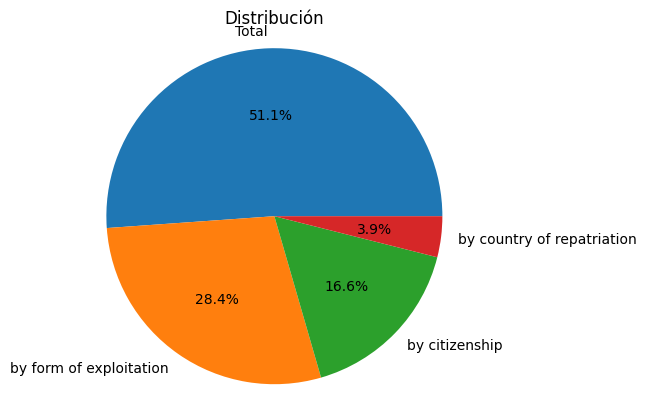

In [14]:
dimension = trata['Dimension']
categoria = trata['Categoría']

contar = dimension.value_counts()
plt.pie(contar.values, labels=contar.index, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Distribución')
plt.show()

Se hace una nueva tabla para ver la relacion entre Dimension y Categoria

In [15]:
columna1 = trata["Dimension"]
columna2 = trata["Categoría"]

df_new = pd.concat([columna1, columna2,], axis=1)

print(df_new)

                        Dimension                    Categoría
2      by country of repatriation                      Ukraine
3      by country of repatriation                       Abroad
4      by country of repatriation                       Abroad
5                           Total                        Total
6                           Total                        Total
...                           ...                          ...
46553     by form of exploitation  Other forms of exploitation
46554     by form of exploitation  Other forms of exploitation
46555     by form of exploitation  Other forms of exploitation
46556     by form of exploitation  Other forms of exploitation
46557     by form of exploitation  Other forms of exploitation

[46556 rows x 2 columns]


In [31]:
df_new.dtypes

Dimension    object
Categoría    object
dtype: object

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46556 entries, 2 to 46557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dimension  46556 non-null  object
 1   Categoría  46469 non-null  object
dtypes: object(2)
memory usage: 727.6+ KB


Exploracion de las cada categoria de dimension:

"by citizenship"

In [16]:
dimensión = df_new["Dimension"]
categoría = df_new["Categoría"]

df_filtrado = df_new.loc[dimensión == "by citizenship"]

print(df_filtrado["Categoría"])

21           Congo
40           Congo
41       Nationals
69           Congo
70         Namibia
           ...    
37653       Angola
37654        Congo
37655       Rwanda
37656       Zambia
37711     Zimbabwe
Name: Categoría, Length: 7722, dtype: object


In [17]:
df_filtrado

,Dimension,Categoría
21,by citizenship,Congo
40,by citizenship,Congo
41,by citizenship,Nationals
69,by citizenship,Congo
70,by citizenship,Namibia
...,...,...
37653,by citizenship,Angola
37654,by citizenship,Congo
37655,by citizenship,Rwanda
37656,by citizenship,Zambia


In [36]:
valores_unicos = df_filtrado["Categoría"].unique()

print(valores_unicos)

['Congo' 'Nationals' 'Namibia' 'Albania' nan '97 albanian' 'Azerbaijan'
 'Bangladesh' 'China' 'India' 'Indonesia' 'Iraq' 'Kazakhstan' 'Morocco'
 'Nigeria' 'Pakistan' 'Philippines' 'Republic of Moldova'
 'Russian Federation' 'Syrian Arab Republic' 'Uzbekistan' 'Kyrgyzstan'
 'Algeria' 'Armenia' 'Ethiopia' 'Lebanon' 'Sri Lanka' 'Thailand'
 'United Arab Emirates' 'Nepal' 'Turkmenistan' 'Colombia'
 'Dominican Republic' 'Tajikistan' 'Argentina'
 'Bolivia (Plurinational State of)' 'Paraguay' 'Peru' 'Brazil' 'Chile'
 'Ecuador' 'Uruguay' 'Venezuela (Bolivarian Republic of)' 'OTROS'
 'Bolivia' 'Brasil' 'Gana' 'Haiti' 'R.Dominicana' 'Senegal'
 'Corea del Sur' 'Sudafrica' 'Desconocido' 'Mexico' 'Rusia'
 'United States of America' 'Costa Rica' 'Cuba' 'Jamaica' 'Marruecos'
 'R.dominicana' 'Siria' 'Republic of Korea' 'Malaysia' 'Australia'
 'Unknown' 'Afghanistan' 'Austria' 'Bulgaria' 'Hungary' 'Lithuania'
 'Romania' 'Slovakia' 'Ukraine' 'Czechia' 'Serbia'
 'The former Yugoslav Republic of Macedonia'

"by country of repatriation"

In [18]:
dimensión = df_new["Dimension"]
categoría = df_new["Categoría"]

df_filtrado2 = df_new.loc[dimensión == "by country of repatriation"]

print(df_filtrado2["Categoría"])

2             Ukraine
3              Abroad
4              Abroad
14             Abroad
15             Abroad
             ...     
37659         Jamaica
37709          Abroad
37710          Abroad
37712    South Africa
37721          Abroad
Name: Categoría, Length: 1830, dtype: object


In [19]:
df_filtrado2

,Dimension,Categoría
2,by country of repatriation,Ukraine
3,by country of repatriation,Abroad
4,by country of repatriation,Abroad
14,by country of repatriation,Abroad
15,by country of repatriation,Abroad
...,...,...
37659,by country of repatriation,Jamaica
37709,by country of repatriation,Abroad
37710,by country of repatriation,Abroad
37712,by country of repatriation,South Africa


In [37]:
valores_unicos = df_filtrado2["Categoría"].unique()

print(valores_unicos)

['Ukraine' 'Abroad' 'Nationals' 'Croatia' 'Albania'
 'Netherlands (Kingdom of the)' 'Norway' 'Portugal' 'Denmark' 'Serbia'
 'Switzerland' 'Germany' 'Indonesia' 'Kazakhstan' 'Kyrgyzstan' 'Nepal'
 'Republic of Moldova' 'Tajikistan' 'Thailand'
 'United Republic of Tanzania' 'Azerbaijan' 'Colombia' 'Tunisia'
 'Uzbekistan' 'Armenia' 'Belarus' 'Nigeria' 'Uganda' 'Rwanda'
 'Turkmenistan' 'Dominican Republic' 'Paraguay' 'Peru'
 'Bolivia (Plurinational State of)' 'Ecuador' 'Honduras' 'ITALIA' 'Mexico'
 '0' 'Panama' 'Bolivia' 'Chile' 'Corea del Sur' 'Espa�a' 'Uruguay'
 'Brasil' 'Costa Rica' 'Guatemala' 'Romania' 'Bulgaria' 'Hungary'
 'Slovakia' 'Venezuela (Bolivarian Republic of)'
 'The former Yugoslav Republic of Macedonia' 'Latvia' 'Burkina Faso'
 'Russian Federation' 'Slovenia' 'croatia' 'El Salvador' 'Kurdistan, Iraq'
 'Mumbai, India' 'South Africa' 'Japan' 'Israel' 'Poland' 'Georgia'
 'Greece' 'Myanmar' 'Mongolia' 'Viet Nam' 'Cambodia' 'Timor-Leste'
 'Lithuania' 'Argentina' 'China' 'ESPA�A'

"by form of exploitation"

In [20]:
dimensión = df_new["Dimension"]
categoría = df_new["Categoría"]

# Filtramos las filas donde la dimensión es repatriación
df_filtrado3 = df_new.loc[dimensión == "by form of exploitation"]

# Visualizamos los valores de la columna categoría
print(df_filtrado3["Categoría"])

7                      Forced labour
8                Sexual exploitation
9                      Forced labour
10               Sexual exploitation
11                     Forced labour
                    ...             
46553    Other forms of exploitation
46554    Other forms of exploitation
46555    Other forms of exploitation
46556    Other forms of exploitation
46557    Other forms of exploitation
Name: Categoría, Length: 13202, dtype: object


In [21]:
df_filtrado3

,Dimension,Categoría
7,by form of exploitation,Forced labour
8,by form of exploitation,Sexual exploitation
9,by form of exploitation,Forced labour
10,by form of exploitation,Sexual exploitation
11,by form of exploitation,Forced labour
...,...,...
46553,by form of exploitation,Other forms of exploitation
46554,by form of exploitation,Other forms of exploitation
46555,by form of exploitation,Other forms of exploitation
46556,by form of exploitation,Other forms of exploitation


In [38]:
valores_unicos = df_filtrado3["Categoría"].unique()

print(valores_unicos)

['Forced labour' 'Sexual exploitation' 'Other forms of exploitation']


"Total"

In [39]:
dimensión = df_new["Dimension"]
categoría = df_new["Categoría"]

# Filtramos las filas donde la dimensión es repatriación
df_filtrado4 = df_new.loc[dimensión == "Total"]

# Visualizamos los valores de la columna categoría
print(df_filtrado4["Categoría"])

5        Total
6        Total
16       Total
17       Total
18       Total
         ...  
42470    Total
42471    Total
42472    Total
42473    Total
42474    Total
Name: Categoría, Length: 23802, dtype: object


In [23]:
df_filtrado4

,Dimension,Categoría
5,Total,Total
6,Total,Total
16,Total,Total
17,Total,Total
18,Total,Total
...,...,...
42470,Total,Total
42471,Total,Total
42472,Total,Total
42473,Total,Total


In [40]:
valores_unicos = df_filtrado4["Categoría"].unique()

print(valores_unicos)

['Total']
